In [2]:
# First we will import the packages we will use in this project
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Load the data into the df
df = pd.read_csv('movies.csv')

In [3]:
# View the data laoded 
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [57]:
# Let's see the data types of the variables
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
#lets find out if there are any duplicates in the dataset
df.isnull()
# We do have some missing data in the table/Dataset

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False
7664,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False
7665,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True
7666,False,True,False,False,False,True,True,False,False,False,False,False,True,True,False


In [7]:
#dropping null/duplicates values 
df.dropna()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


In [14]:
#Dropping duplicate values
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


<Axes: >

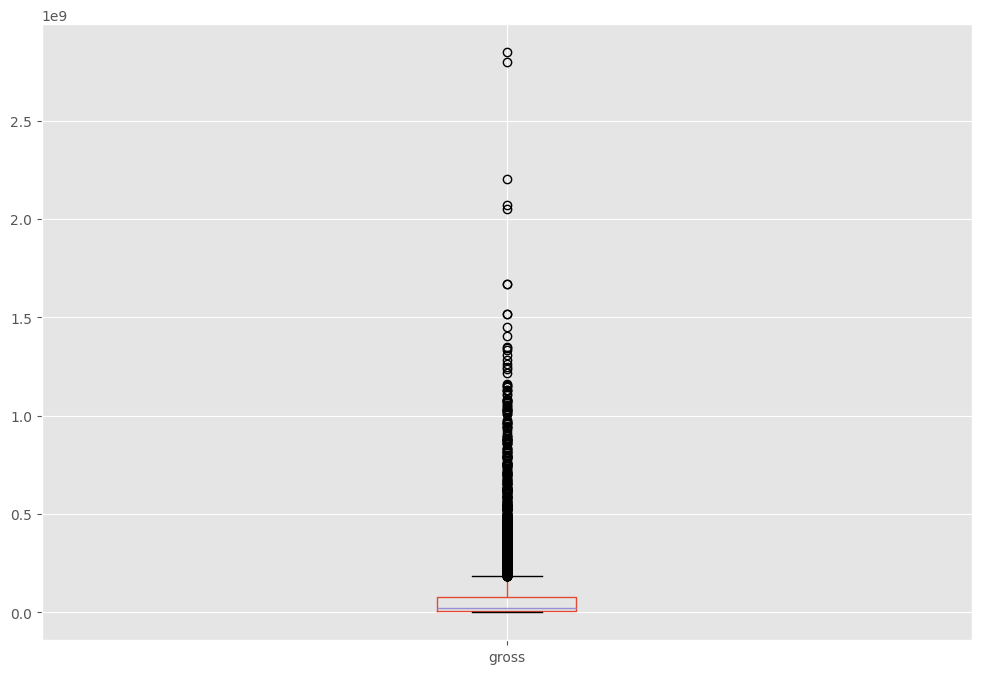

In [29]:
# Finding Outliers in the dataset - Gross

df.boxplot(column=['gross'])

# We do have some outliers in the dataset 

<Axes: >

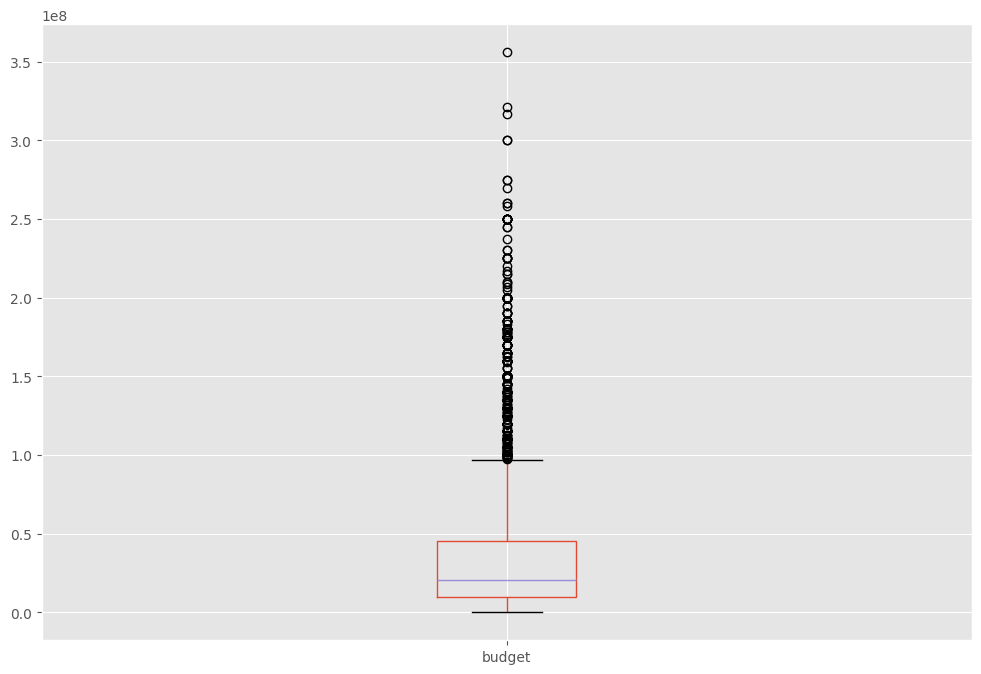

In [30]:
# Finding Outliers in the dataset - budget

df.boxplot(column=['budget'])

In [31]:
# Ordering the data in descending order for gross and budget

df.sort_values(by=['gross','budget'], inplace=False, ascending=False)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7630,Open,NaN,Drama,2019,"October 4, 2019 (United States)",7.9,73.0,Andoy Ranay,Wanggo Gallaga,JC Santos,Philippines,NaN,NaN,ABS-CBN Film Productions,105.0
7641,By Light of Desert Night,NaN,Drama,2019,"March 3, 2020 (United States)",4.8,373.0,David Stuart Snell,David Stuart Snell,Alexandra Bokova,United States,NaN,NaN,Canyon Media,94.0
7660,Aloha Surf Hotel,NaN,Comedy,2020,"November 5, 2020 (United States)",7.1,14.0,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,NaN,NaN,Abominable Pictures,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0


In [86]:
df.columns.tolist()

['name',
 'rating',
 'genre',
 'year',
 'released',
 'score',
 'votes',
 'director',
 'writer',
 'star',
 'country',
 'budget',
 'gross',
 'company',
 'runtime']

Text(0.5, 0.98, 'Regression plot for budget and gross data ')

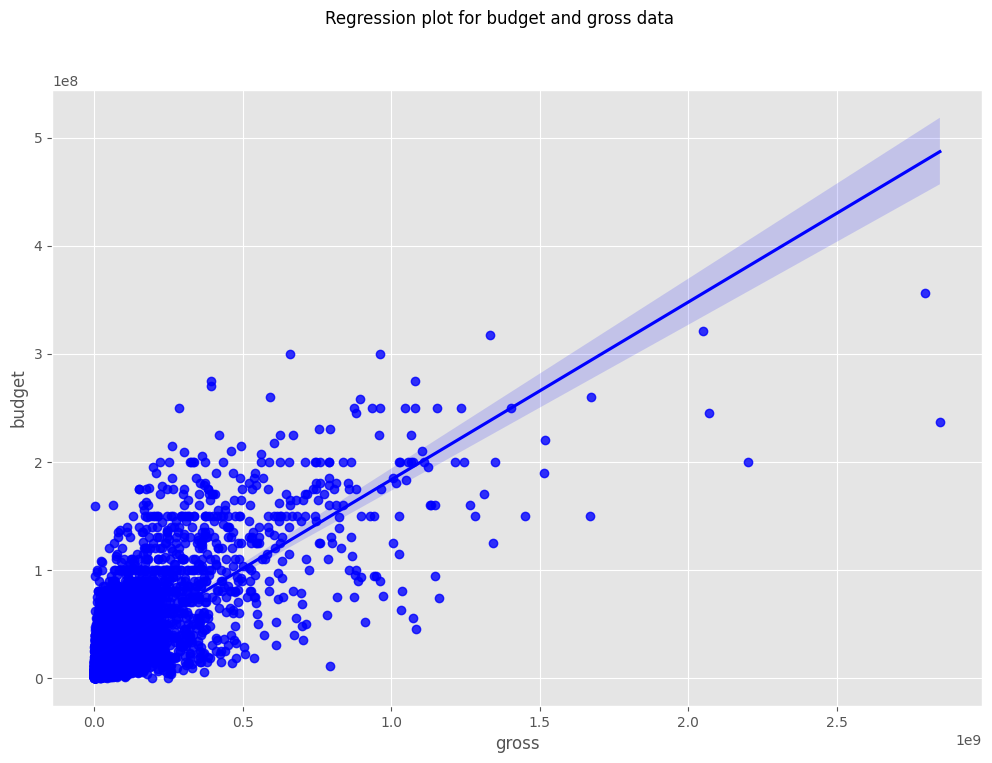

In [33]:
# Creating a regression plot for budget and gross data 
sns.regplot(x='gross', y='budget', data=df, color='b')
plt.suptitle("Regression plot for budget and gross data ")


Text(0.5, 0.98, 'regression plot for score and gross data')

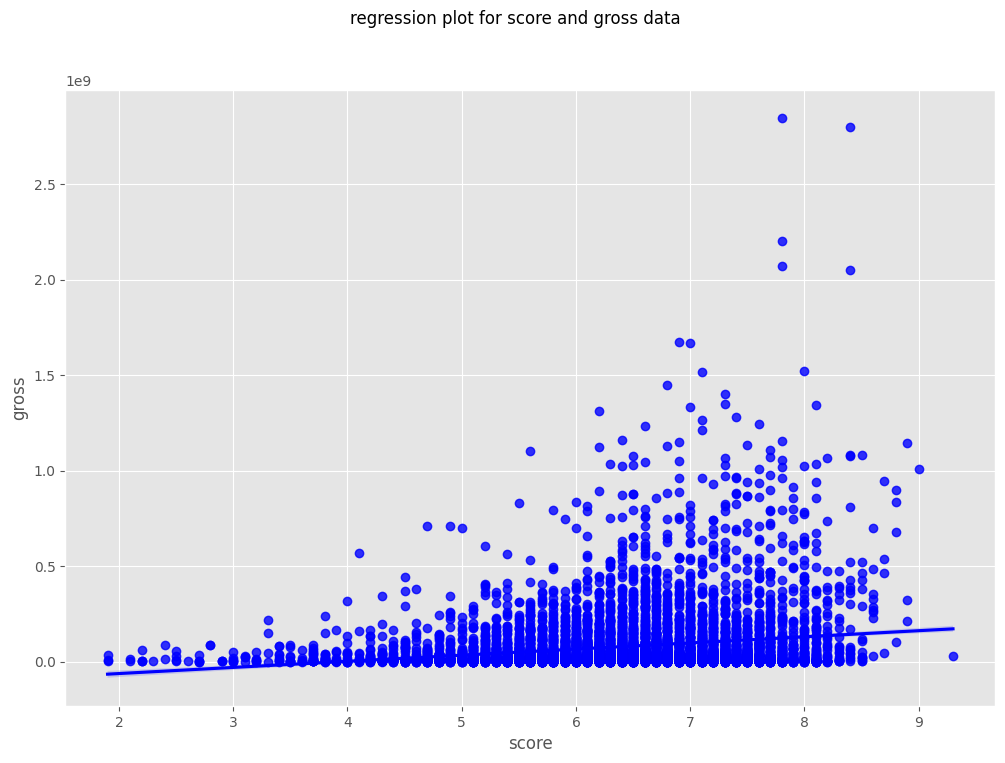

In [35]:
# Creating a regression plot for score and gross data 
sns.regplot(x='score', y='gross', data=df, color='b')
plt.suptitle("Regression plot for score and gross data")

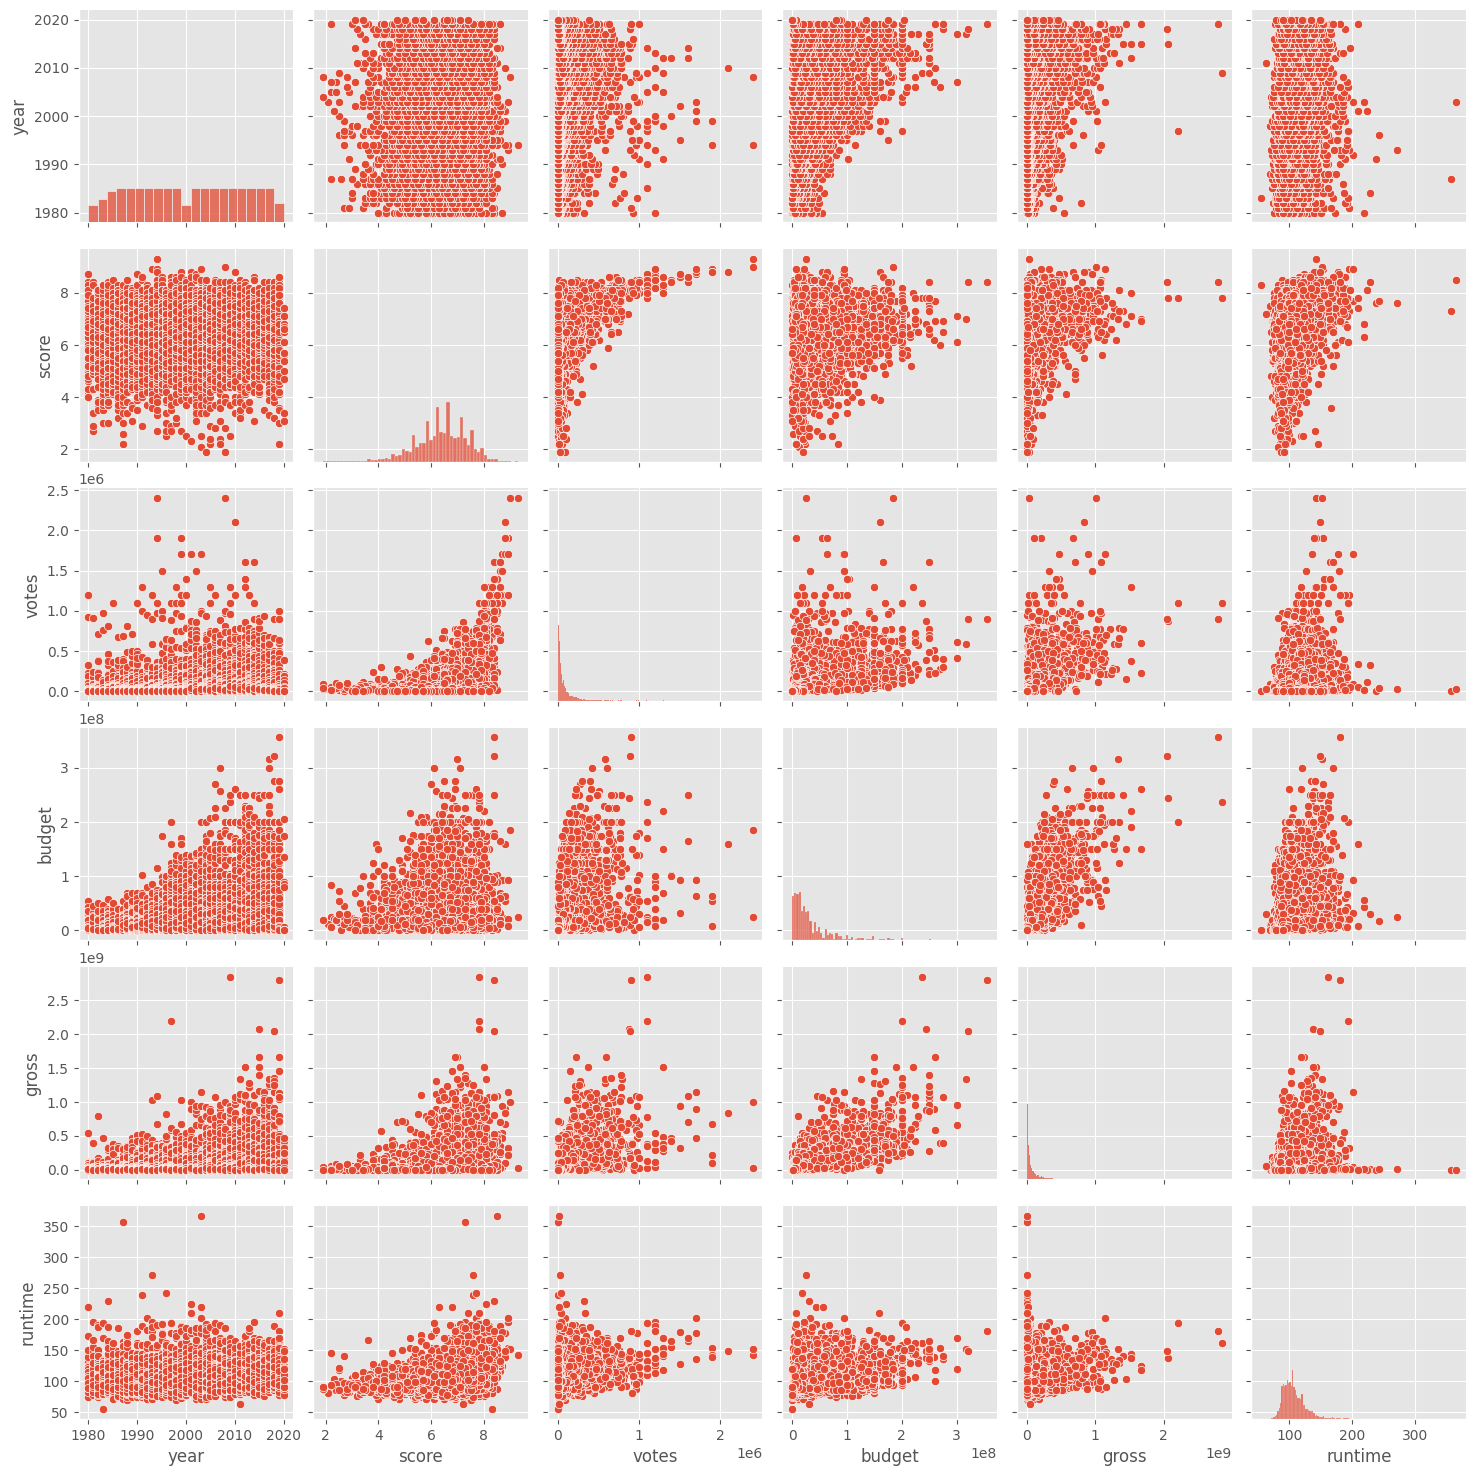

In [42]:
# Creating a pairplot between the table variables
sns.pairplot(df)
plt.show()

In [48]:
# Creating a new df that includes only the important variables for analysis
selected_columns = ['name', 'score', 'director', 'budget', 'gross', 'company']
new_df = df[selected_columns]
new_df

,name,score,director,budget,gross,company
0,The Shining,8.4,Stanley Kubrick,19000000.0,46998772.0,Warner Bros.
1,The Blue Lagoon,5.8,Randal Kleiser,4500000.0,58853106.0,Columbia Pictures
2,Star Wars: Episode V - The Empire Strikes Back,8.7,Irvin Kershner,18000000.0,538375067.0,Lucasfilm
3,Airplane!,7.7,Jim Abrahams,3500000.0,83453539.0,Paramount Pictures
4,Caddyshack,7.3,Harold Ramis,6000000.0,39846344.0,Orion Pictures
...,...,...,...,...,...,...
7663,More to Life,3.1,Joseph Ebanks,7000.0,NaN,NaN
7664,Dream Round,4.7,Dusty Dukatz,NaN,NaN,Cactus Blue Entertainment
7665,Saving Mbango,5.7,Nkanya Nkwai,58750.0,NaN,Embi Productions
7666,It's Just Us,NaN,James Randall,15000.0,NaN,NaN


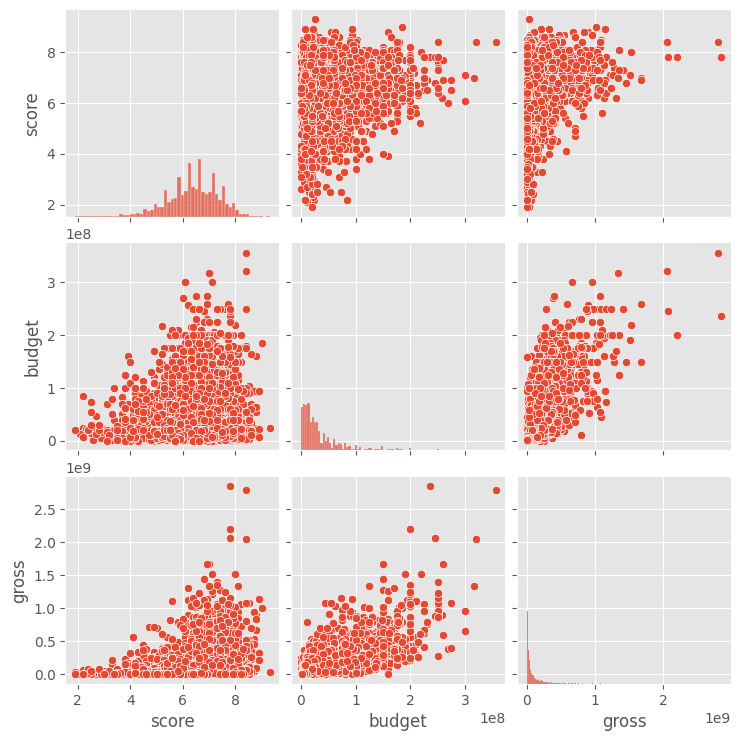

In [51]:
sns.pairplot(new_df)

In [59]:
# Converting the object type to str

new_df.dtypes

name         object
score       float64
director     object
budget      float64
gross       float64
company      object
dtype: object

In [66]:
new_df['name'] = new_df['name'].astype(str)
new_df['director'] = new_df['director'].astype(str)
new_df['company'] = new_df['company'].astype(str)

new_df.dtypes

name         object
score       float64
director     object
budget      float64
gross       float64
company      object
dtype: object

In [69]:
new_df['company'] = new_df['company'].astype(str)

In [73]:
# Creating a new df which contains only the dtype as numeric 
numeric_df = df.select_dtypes(include=['float64'])
numeric_df

,score,votes,budget,gross,runtime
0,8.4,927000.0,19000000.0,46998772.0,146.0
1,5.8,65000.0,4500000.0,58853106.0,104.0
2,8.7,1200000.0,18000000.0,538375067.0,124.0
3,7.7,221000.0,3500000.0,83453539.0,88.0
4,7.3,108000.0,6000000.0,39846344.0,98.0
...,...,...,...,...,...
7663,3.1,18.0,7000.0,NaN,90.0
7664,4.7,36.0,NaN,NaN,90.0
7665,5.7,29.0,58750.0,NaN,NaN
7666,NaN,NaN,15000.0,NaN,120.0


In [76]:
# Creating a corr table
numeric_df.corr(method='pearson')

,score,votes,budget,gross,runtime
score,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.399451,0.309212,0.320447,0.245216,1.000000


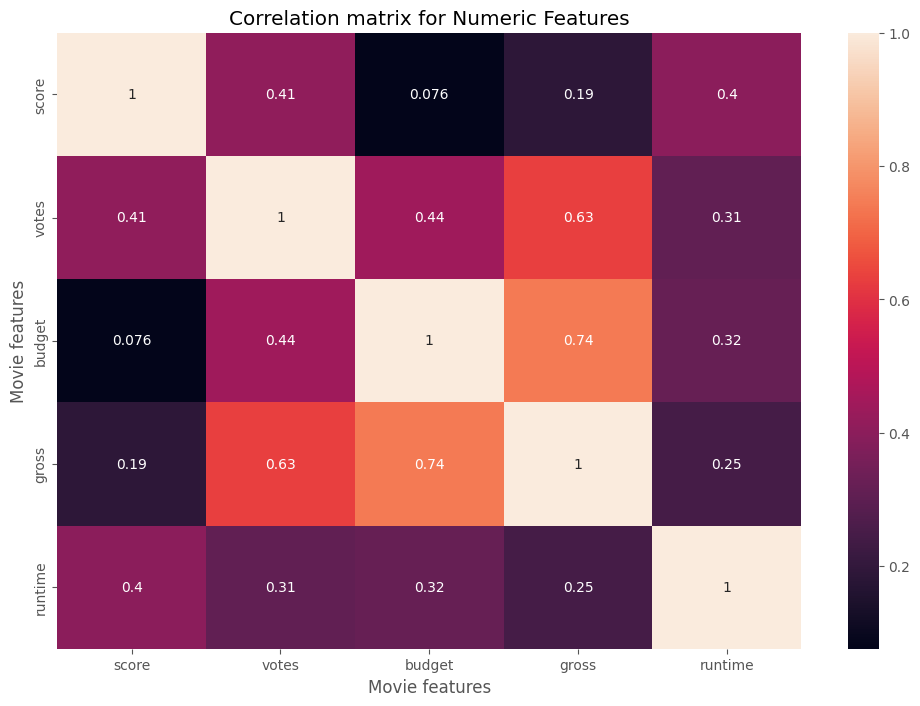

In [77]:
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [98]:
# Looking at the top 15 compaies by gross revenue

company_grosssum = df.groupby(['company','gross']).sum().reset_index()
company_grosssum


,company,gross,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,runtime
0,"""DIA"" Productions GmbH & Co. KG",44350926.0,A Man Apart,R,Action,2003,"April 4, 2003 (United States)",6.1,46000.0,F. Gary Gray,Christian Gudegast,Vin Diesel,United States,36000000.0,109.0
1,"""Weathering With You"" Film Partners",193457467.0,Weathering with You,PG-13,Animation,2019,"January 17, 2020 (United States)",7.5,28000.0,Makoto Shinkai,Makoto Shinkai,Kotaro Daigo,Japan,11100000.0,112.0
2,.406 Production,10580.0,Schizopolis,Not Rated,Comedy,1996,"April 9, 1997 (United States)",6.8,5300.0,Steven Soderbergh,Steven Soderbergh,Steven Soderbergh,United States,250000.0,96.0
3,1+2 Seisaku Iinkai,1196218.0,Yi Yi,Not Rated,Drama,2000,"December 16, 2000 (Japan)",8.2,22000.0,Edward Yang,Edward Yang,Nien-Jen Wu,Taiwan,0.0,173.0
4,10 West Studios,814906.0,What If...,PG,Drama,2010,"April 23, 2010 (Brazil)",6.4,2600.0,Dallas Jenkins,Chuck Konzelman,Kevin Sorbo,United States,0.0,111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,i am OTHER,17986781.0,Dope,R,Adventure,2015,"June 19, 2015 (United States)",7.2,82000.0,Rick Famuyiwa,Rick Famuyiwa,Shameik Moore,United States,7000000.0,103.0
7465,i5 Films,10031529.0,The Deep End,R,Crime,2001,"August 31, 2001 (United States)",6.6,11000.0,Scott McGehee,Elisabeth Sanxay Holding,Tilda Swinton,United States,3000000.0,101.0
7466,iDeal Partners Film Fund,506303.0,The Inevitable Defeat of Mister & Pete,R,Drama,2013,"January 25, 2013 (United States)",7.5,5300.0,George Tillman Jr.,Michael Starrbury,Skylan Brooks,United States,0.0,108.0
7467,micro_scope,7099598.0,Incendies,R,Drama,2010,"January 12, 2011 (France)",8.3,158000.0,Denis Villeneuve,Denis Villeneuve,Lubna Azabal,Canada,6800000.0,131.0


In [103]:
CompanyGrossSum = df.groupby('company')[["gross"]].sum()
CompanyGrossSum

,gross
company,
"""DIA"" Productions GmbH & Co. KG",44350926.0
"""Weathering With You"" Film Partners",193457467.0
.406 Production,10580.0
1+2 Seisaku Iinkai,1196218.0
10 West Studios,814906.0
...,...
i am OTHER,17986781.0
i5 Films,10031529.0
iDeal Partners Film Fund,506303.0


In [104]:
# Looking at the top 15 companies by gross revenue

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]
CompanyGrossSumSorted

,gross
company,
Warner Bros.,5.649142e+10
Universal Pictures,5.251419e+10
Columbia Pictures,4.300894e+10
Paramount Pictures,4.049361e+10
Twentieth Century Fox,4.025705e+10
Walt Disney Pictures,3.632789e+10
New Line Cinema,1.988380e+10
Marvel Studios,1.506559e+10
DreamWorks Animation,1.187361e+10


In [105]:
CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 
CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [106]:
# Creating a table to display company, year, and gross value

CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2010    3300479986
                       2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Name: gross, dtype: int64

In [107]:
# Creating a table to display company, year, and gross value

CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

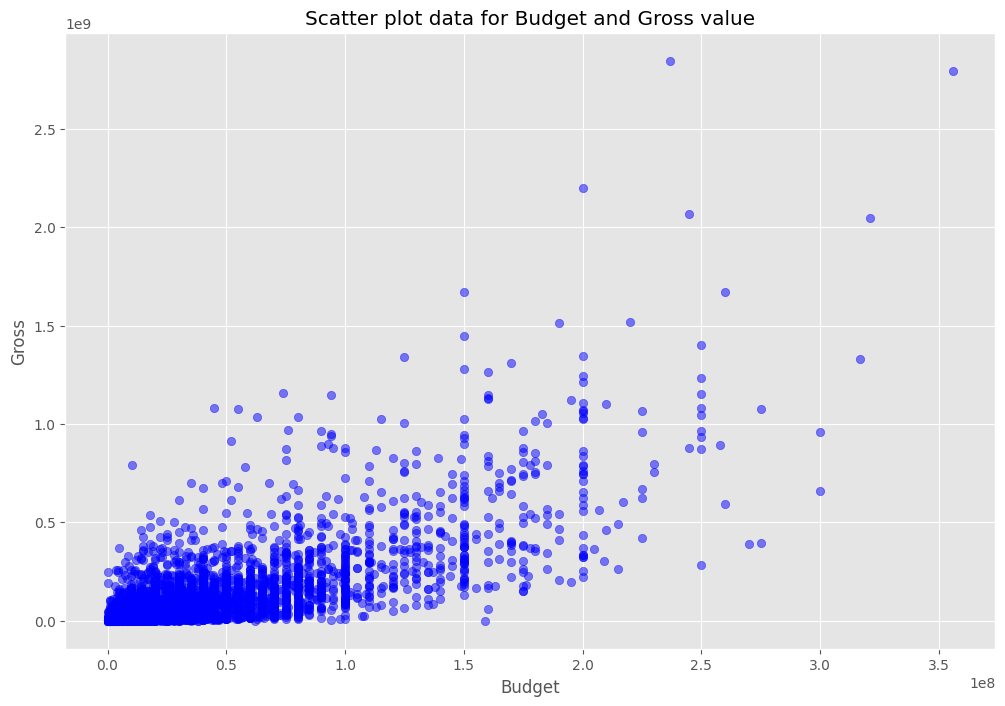

In [111]:
plt.scatter(x=df['budget'], y = df['gross'], alpha=0.5, color='b')
plt.title("Scatter plot data for Budget and Gross value")
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

# The plot illustrates a positive correlation between the budget and the gross value of the movie. 
# High Budget generated more revenue compared to less budget movies.  

In [122]:
for col_name in df.columns:
    if (df[col_name].dtype =='object'):
        df[col_name] = df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

In [120]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

In [117]:
print(df.head(10))

   name  rating  genre  year  released  score      votes  director  writer  \
0  6587       6      6  1980      1705    8.4   927000.0      2589    4014   
1  5573       6      1  1980      1492    5.8    65000.0      2269    1632   
2  5142       4      0  1980      1771    8.7  1200000.0      1111    2567   
3   286       4      4  1980      1492    7.7   221000.0      1301    2000   
4  1027       6      4  1980      1543    7.3   108000.0      1054     521   
5  2109       6     10  1980      2502    6.4   123000.0      2528    4362   
6  5574       6      0  1980      1771    7.9   188000.0      1412     838   
7  4436       6      3  1980       699    8.2   330000.0      1829    1769   
8  5281       4      0  1980      1753    6.8   101000.0      2306    1979   
9  6213       6      3  1980      2286    7.0    10000.0      2864     423   

   star  country      budget        gross  company  runtime  
0  1047       54  19000000.0   46998772.0     2319    146.0  
1   327       55 

<Axes: xlabel='rating', ylabel='gross'>

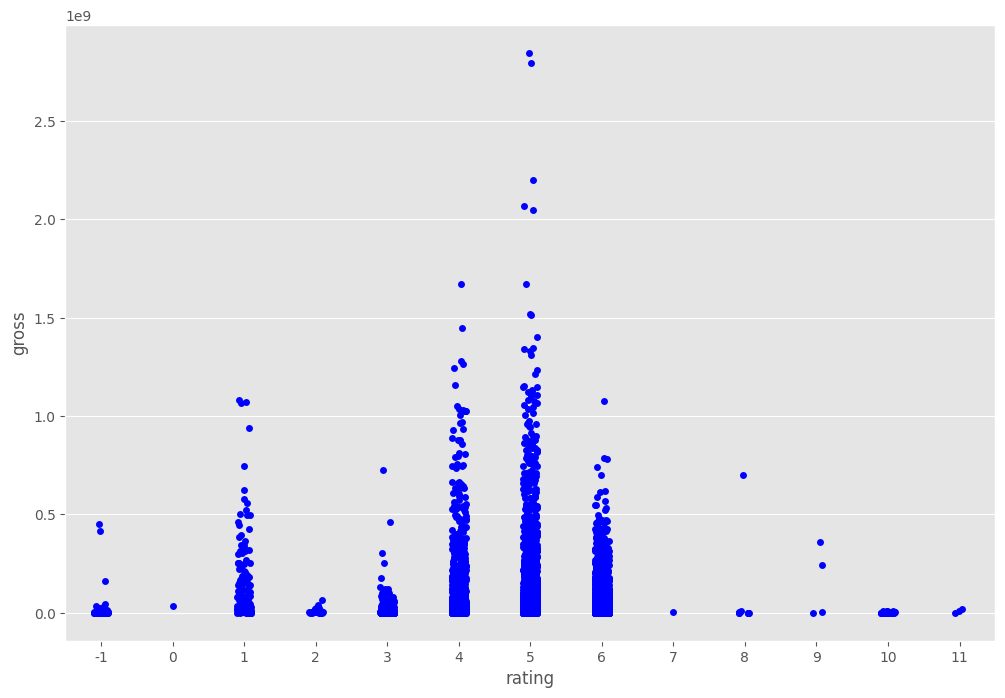

In [134]:
sns.stripplot(x="rating", y="gross", data=df, color='b')
# Movies which has received an rating of 4,5 & 6 have the highest gross value compared to other movies with higher/lower rating

In [145]:
# Create a table for the year 2014, score more than 5 and score above 8.0

df2014 = df[(df['year'] == 2014) & (df['rating'] >= 5) & (df['score'] >=8.0)]
df2014

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6443,2331,5,0,2014,291,8.0,1100000.0,1169,1798,437,55,170000000.0,773350147.0,1606,121.0
6444,2796,5,1,2014,2781,8.6,1600000.0,483,2265,1802,55,165000000.0,701729206.0,1812,169.0
6447,2264,6,6,2014,3029,8.1,893000.0,619,1502,220,55,61000000.0,369330363.0,2253,149.0
6449,5938,6,1,2014,2123,8.1,734000.0,2873,3992,2168,55,25000000.0,172945750.0,1113,99.0
6450,7315,6,6,2014,2871,8.5,749000.0,551,834,1917,55,3300000.0,49396747.0,445,106.0
6461,6059,5,3,2014,807,8.0,707000.0,1993,1524,232,54,14000000.0,233555708.0,407,114.0
6500,7364,6,4,2014,420,8.1,184000.0,553,1492,575,0,3300000.0,30642704.0,1441,122.0
6532,3672,6,6,2014,3100,8.1,53000.0,2915,4496,148,6,NaN,13156856.0,1499,139.0
6547,6489,6,0,2014,35,8.0,117000.0,913,1412,1024,21,4500000.0,6566916.0,2103,150.0


Text(0, 0.5, 'Gross')

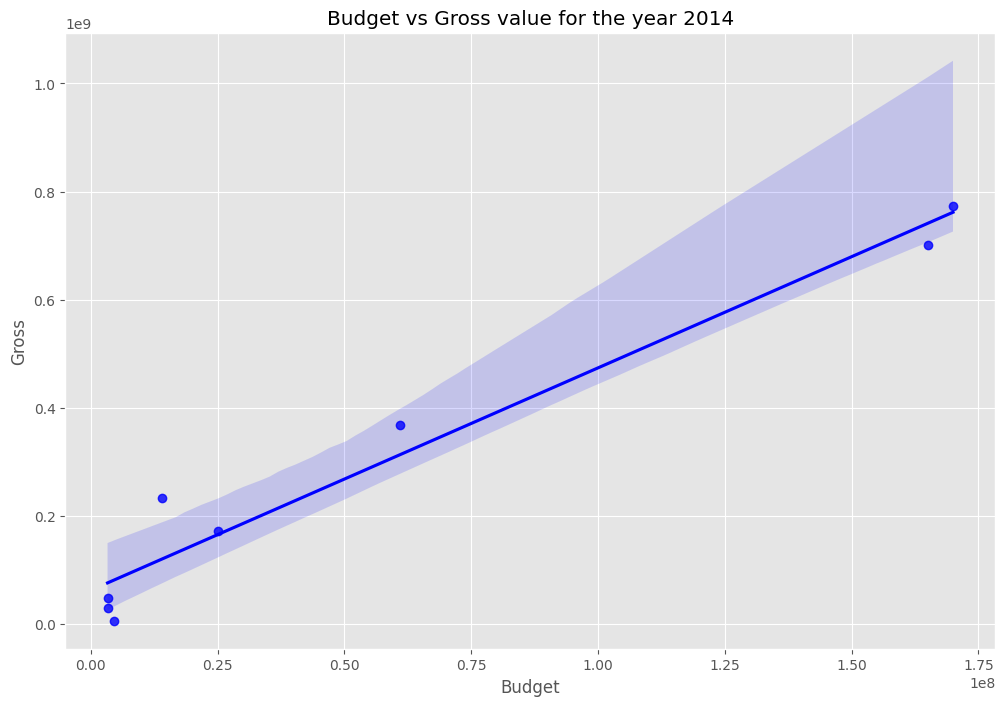

In [155]:
reg_plot = sns.regplot(x='budget', y ='gross', data = df2014, color='b')
reg_plot.set_title('Budget vs Gross value for the year 2014')
reg_plot.set_xlabel('Budget')
reg_plot.set_ylabel('Gross')